## **MODELO**

Instalar y cargar librerias

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import AdditiveChi2Sampler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import seaborn as sns
import multiprocessing
import pickle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import ShuffleSplit
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_validate

**Carga de datos**

In [3]:
df= pd.read_csv('./data/df.csv')

**Tratamiento nulos**

In [4]:
# Se remplaza los nulos por el numero cero, ya que representan los empleados que no han renunciado
df  = df.fillna(0)

**Tratamiento de variables**

In [5]:
#se escalan los datos de la variable edad 
Scaler = MinMaxScaler()
df[['age']] = Scaler.fit_transform(df[['age']])

In [6]:
#Se remplaza las categorias string por caregorias numericas

#businesstravel
dic = {
    'travel_rarely' : 2,
    'travel_frequently' : 3,
    'non-travel' : 1,
    
}

#department
dic1 = {
    'sales' : 1,
    'research & development' : 2,
    'human resources' : 3,
    'technical degree' : 4,
    'human resources'   :5
}

#educationfield
dic2 = {
    'life sciences' : 1,
    'other' : 2,
    'medical' : 3,
    'marketing': 4,
    'technical degree': 5,
    'human resources': 6
    
}

#resignationreason
dic3 = {
    'others' : 1,
    'stress' : 2,
    'salary' : 3,
    
}

#Gender
dic4 = {
    'female' : 0,
    'male' : 1,
    
    
}

#maritalstatus
dic5 = {
    'married' : 1,
    'single' : 2,
    'divorced': 3,
    
    
}

In [7]:
#Remplazo 
df.businesstravel = df.businesstravel.replace(dic)
df.department = df.department.replace(dic1)
df.educationfield = df.educationfield.replace(dic2)
df.resignationreason = df.resignationreason.replace(dic3)
df.gender = df.gender.replace(dic4)
df.maritalstatus = df.maritalstatus.replace(dic5)
df.retirementtype= df.retirementtype.replace("resignation",1)

In [8]:
lencoder = LabelEncoder()
lencoder.fit(df.jobrole.unique())
df['jobrole'] = lencoder.transform(df.jobrole.values)

In [9]:
# Se eliminan algunas columnas

df=df.drop(['retirementdate','resignationreason'], axis=1)

### **Future selection**

In [10]:
df.retirementtype.unique()

array([0, 1], dtype=int64)

In [11]:
target = ['retirementtype']
X = df.iloc[:,~df.columns.isin(target)].values
y = df.retirementtype

***Kbest***

In [12]:
#crear un modelo de selección
est_prueba = SelectKBest(score_func=f_classif, k=15)
est_ajustado = est_prueba.fit(X, y)

#Muestro el desempeño de los features basado en el valoir F
set_printoptions(precision=10)
print(est_ajustado.scores_)
features = est_ajustado.transform(X)
print(features)

[5.1782758734e-02 3.6101655573e+01 4.4628770423e+01 1.8454801928e+01
 9.6014335853e+01 6.7195449834e+01 2.5661221056e+01 1.2143257614e-01
 1.1086134055e+00 2.1515347053e-01 3.4463812293e-01 3.9762219137e-01
 3.3143183480e+00 6.3770694601e-01 2.0526564143e+00 1.0790552814e+01
 2.7912218522e+00 3.7213334071e-02 1.1836916784e+02 1.3000500838e+01
 7.6788034750e+01 4.4169649710e+00 9.8142283032e+01 1.1560089200e+00
 1.4360903333e+00]
[[ 3.  4.  2. ...  1.  0.  0.]
 [ 3.  2.  4. ...  5.  1.  4.]
 [ 2.  2.  1. ...  5.  0.  3.]
 ...
 [ 1.  3.  3. ...  4.  1.  2.]
 [ 4.  1.  3. ...  9.  7.  8.]
 [ 1.  3.  3. ... 21.  3.  9.]]


In [13]:
dicscore = {df.columns[i]:est_ajustado.scores_[i] for i in range(len(df.columns[:-1]))
  
}
sorted(dicscore.items(), key=lambda x:x[1], reverse=True)

[('totalworkingyears', 118.36916783518325),
 ('yearswithcurrmanager', 98.14228303152558),
 ('age', 96.01433585287093),
 ('yearsatcompany', 76.78803474964909),
 ('businesstravel', 67.1954498338961),
 ('jobsatisfaction', 44.62877042344758),
 ('environmentsatisfaction', 36.10165557342693),
 ('department', 25.661221056403715),
 ('worklifebalance', 18.454801928098494),
 ('trainingtimeslastyear', 13.000500837500974),
 ('numcompaniesworked', 10.790552814261668),
 ('yearssincelastpromotion', 4.4169649710091905),
 ('jobrole', 3.314318348041877),
 ('percentsalaryhike', 2.7912218521850867),
 ('monthlyincome', 2.0526564142582044),
 ('performancerating', 1.436090333283191),
 ('jobinvolvement', 1.1560089199834365),
 ('education', 1.1086134055069847),
 ('maritalstatus', 0.6377069460115579),
 ('joblevel', 0.3976221913696033),
 ('gender', 0.3446381229306226),
 ('educationfield', 0.21515347052514266),
 ('distancefromhome', 0.12143257614305691),
 ('employeeid', 0.051782758734195),
 ('stockoptionlevel', 0

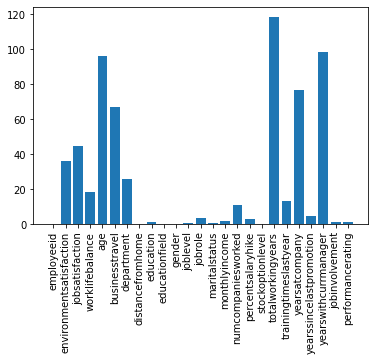

In [14]:
#Se procede a realizar una grafica para visualizar el numero de features a seleccionar 
pesos = dicscore.values()
valores = range(len(pesos))
plt.bar(x=valores,height=pesos)
plt.xticks(valores, dicscore.keys(), rotation = 90)
plt.show()


Los features seleccionados por el metodo Kbest son: ('totalworkingyears', 118.36916783518325),
 ('yearswithcurrmanager', 98.14228303152558),
 ('age', 96.01433585287093),
 ('yearsatcompany', 76.78803474964909),
 ('businesstravel', 67.1954498338961),
 ('jobsatisfaction', 44.62877042344758),
 ('environmentsatisfaction', 36.10165557342693),
 ('department', 25.661221056403715),
 ('worklifebalance', 18.454801928098494),


**Recursive Feature Elimination**

In [15]:
modelo = LogisticRegression(solver='liblinear')
est_rfe = RFE(modelo, n_features_to_select=15)
est_ajustado = est_rfe.fit(X,y)

print(est_ajustado.n_features_)
print(est_ajustado.support_)
print(est_ajustado.ranking_)

15
[False  True  True  True  True  True  True False  True False False  True
 False False False  True False False  True  True False  True  True  True
  True]
[10  1  1  1  1  1  1  9  1  6  3  1  5  2 11  1  8  4  1  1  7  1  1  1
  1]


In [16]:
dicscore1 = [df.columns[i] for i in range(len(df.columns[:-1])) if est_ajustado.support_[i]==True]
dicscore1
#Los features seleccionados por el metodo Recursive Feature Elimination son:

['environmentsatisfaction',
 'jobsatisfaction',
 'worklifebalance',
 'age',
 'businesstravel',
 'department',
 'education',
 'joblevel',
 'numcompaniesworked',
 'totalworkingyears',
 'trainingtimeslastyear',
 'yearssincelastpromotion',
 'yearswithcurrmanager',
 'jobinvolvement',
 'performancerating']

Al realizar la comparación entre los dos metodos, se descarta la variable yearsatcompany.

df con los features seleccionados

In [ ]:
df1 = df[['totalworkingyears',
 'yearswithcurrmanager',
 'age', 'businesstravel',
 'jobsatisfaction',
 'environmentsatisfaction',
 'department','worklifebalance','retirementtype']]

df1.rename(columns={'retirementtype':'retired'},inplace=True)

Guardar df

In [18]:
df1.to_csv('./data/df1.csv', index=False)

Actualizar X

In [19]:
target = ['retired']
X = df1.iloc[:,~df1.columns.isin(target)].values
y = df1[target].values

### **Selección del modelo**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Se realiza balanceo de X_train y y_train

In [21]:
os =  RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = os.fit_resample(X_train, y_train)

SGDclassifier

In [22]:
# Se utilizo como modelo supervisado SGD y como parametro loss "perceptron"
modelo1 = SGDClassifier(loss="perceptron", penalty="l2", max_iter=500)
modelo1.fit(X_train, y_train)

c:\Users\Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='perceptron', max_iter=500)

Score del modelo

In [23]:
modelo1.score(X_test, y_test)

0.8548387096774194

In [24]:
# Se utilizo como modelo supervisado SGD y como parametro loss "huber"
modelo2 = SGDClassifier(loss="huber", penalty="l2", max_iter=500)
modelo2.fit(X_train, y_train)

c:\Users\Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='huber', max_iter=500)

Score del modelo

In [25]:
modelo2.score(X_test, y_test)

0.8609831029185868

Kernel aproximation

In [26]:
# se utilizo como modelo supervisado categorico kernel approximation 

chi2sampler = AdditiveChi2Sampler()
X_transformed = chi2sampler.fit_transform(X_train, y_train)
modelo3 = SGDClassifier(max_iter=250, random_state=0, tol=1e-3)
modelo3.fit(X_transformed, y_train)

c:\Users\Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=250, random_state=0)

Score del modelo

In [27]:
X_test_transformed = chi2sampler.fit_transform(X_test, y_test)
modelo3.score(X_test_transformed,y_test)

0.8771121351766513

### **Selección del modelo**


Se selecciono el modelo kernel aproximation, ya que fue el que arrojo un mejor score, siendo este del 87.7%, a continuación se realizara la evaluaccion de hiperparametros. para evaluar el modelo que mejor se comporte se utiliza como metrica el recall, debido a que maximiza la deteccion de personas que se van a retirar.

**Hiperparametros**

In [41]:
#Se crea funcion para realizar la evaluacion de hiperparametros
def evaluar_hiperparametros(estimator, param_grid, X_train, y_train):
        grid = GridSearchCV(
                        estimator  = estimator,
                        param_grid = param_grid,
                        scoring    = 'recall',
                        n_jobs     = multiprocessing.cpu_count() - 1,
                        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
                        refit      = True,
                        verbose    = 0,
                        return_train_score = True
                )
        grid.fit(X = X_train, y = y_train)        
        resultados = pd.DataFrame(grid.cv_results_)
        
        print("Mejores hiperparámetros encontrados (cv): ")
        print(grid.best_params_, ":", grid.best_score_, grid.scoring)
        modelo = grid.best_estimator_\
                        
        return resultados, grid, modelo

def performance_model(modelo, X_test, y_test):        
        predicciones = modelo.predict(X = X_test)
        sns.scatterplot(x=y_test, y=predicciones)
        rmse = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
        )
        print(f"El error (recall) de test es: {rmse}")
        return rmse

In [42]:
param_grid = {'max_iter': [150, 200, 250, 300],
              'random_state': [0,3,5, 7, 9],
              'tol'   : [1e-4,1e-3, 1e-2]
             }

estimator = SGDClassifier()

res_rf, grid_rf, modelo_rf = evaluar_hiperparametros(estimator, param_grid, X_over, y_over)

Mejores hiperparámetros encontrados (cv): 
{'max_iter': 150, 'random_state': 9, 'tol': 0.01} : 0.5145065774392917 recall


### **MODELO**

**Algoritmos de desempeño**

KFold

In [ ]:
 # se aplica el algoritmo kfold-Cross validation al modelo con los hiperparametros seleccionados

Kfld = KFold(n_splits=15)
modelo3 = SGDClassifier(max_iter=150, random_state=9, tol=0.01)
data1 = pd.DataFrame(cross_val_score(modelo3, X, y, cv=Kfld), columns=['score'])
modelo3.fit(X_over, y_over)

In [57]:
data1.score.mean()

0.8214851051982659

In [58]:
# Se realiza grafica para observar el score de cada corrida

fig = go.Figure()

fig.add_trace(go.Box(
    y=data1.score.values,
    name="Score",
    marker_color='rgb(9,56,125)',
    line_color='rgb(9,56,125)'
))
fig.update_layout(title="Box Plot kfold")
fig.show()

La grafica realizada muestra que el modelo presenta un comportamiento atipico en una de las corridas, pero su comportamiento general es estable.

 Repeat Random Test

In [ ]:
# se aplica al modelo seleccionado el algoritmo de desempeño repeat random 

rrKfld = ShuffleSplit(n_splits=15, test_size=0.34, random_state=7)
modelo3 = SGDClassifier(max_iter=150, random_state=9, tol=0.01)
data2 = pd.DataFrame(cross_val_score(modelo1, X, y, cv=rrKfld), columns=['score'])

In [69]:
#Se calcula el score
round(data2.score.median(),3)

0.848

In [70]:
#Se grafica para observar el comportamiento de los score en cada una de las corridas
fig = go.Figure()

fig.add_trace(go.Box(
    y=data2.score.values,
    name="Score",
    marker_color='rgb(9,56,125)',
    line_color='rgb(9,56,125)'
))
fig.update_layout(title="Box Plot R.Random")
fig.show()

**Metricas**

Accuracy

In [ ]:
Kfld = KFold(n_splits=15)

modelo3 = SGDClassifier(max_iter=150, random_state=9, tol=0.01)
data4 = pd.DataFrame(cross_val_score(modelo1, X, y, cv=Kfld, scoring = 'accuracy'), columns=['score'])

In [72]:
fig = go.Figure()

fig.add_trace(go.Box(
    y=data4.score.values,
    name="Score",
    marker_color='rgb(0,128,0)',
    line_color='rgb(0,128,0)'
))
fig.update_layout(title="Box Plot Accuracy")
fig.show()

In [73]:
round(data4.score.median(),3)

0.855

**Guardar modelo**

In [59]:
# Se guarda el modelo como archivo binario
nombreArchivo = "./data/modelo.pkl"
pickle.dump(modelo3, open(nombreArchivo, 'wb'))

In [60]:
# Se carga el modelo
LoadedModel = pickle.load(open(nombreArchivo, 'rb'))

**Predicción**

In [61]:
# Se realiza la predicción
prediccion = LoadedModel.predict(X_test)

Matrix de confusion

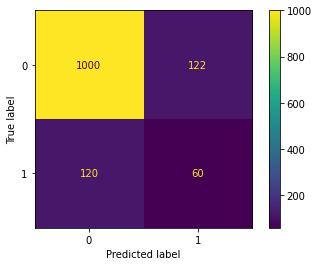

In [64]:
# Matrix de confusion para el modelo 
from sklearn.metrics.cluster import contingency_matrix
cm = contingency_matrix(y_test, prediccion)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()
plt.show()

Realizando la predicción, se obtuvo la anterior matriz, la cual nos muestra la preddiciones respecto a los datos reales